In [1]:
import kaggle

In [2]:
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv


Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0




  0%|          | 0.00/200k [00:00<?, ?B/s]
100%|##########| 200k/200k [00:00<00:00, 209kB/s]
100%|##########| 200k/200k [00:00<00:00, 209kB/s]


In [3]:
#extract file from zip file
import zipfile
zip_ref = zipfile.ZipFile('orders.csv.zip') 
zip_ref.extractall() # extract file to dir
zip_ref.close() # close file

In [5]:
#read data from the file and handle null values
import pandas as pd
df = pd.read_csv('orders.csv',na_values=['Not Available','unknown']) 

df.head(21)


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [6]:
df['Ship Mode'].unique()
#rename columns names ..make them lower case and replace space with underscore
df.rename(columns={'Order Id':'order_id', 'City':'city'})
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [7]:
#derive new columns discount , sale price and profit
df['discount']=df['list_price']*df['discount_percent']*.01
df['sale_price']= df['list_price']-df['discount']
df['profit']=df['sale_price']-df['cost_price']
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1,-0.9


In [18]:
#convert order date from object data type to datetime
df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d")
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


In [22]:
#load the data into sql server using replace option
import sqlalchemy as sal
engine = sal.create_engine('mssql://DESKTOP-FPG7V5K\SQLEXPRESS/retails?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn=engine.connect()

In [23]:
#load the data into sql server using append option
df.to_sql('orders', con=conn , index=False, if_exists = 'append')

38

In [27]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9994 non-null   int64         
 1   order_date    9994 non-null   datetime64[ns]
 2   ship_mode     9988 non-null   object        
 3   segment       9994 non-null   object        
 4   country       9994 non-null   object        
 5   city          9994 non-null   object        
 6   state         9994 non-null   object        
 7   postal_code   9994 non-null   int64         
 8   region        9994 non-null   object        
 9   category      9994 non-null   object        
 10  sub_category  9994 non-null   object        
 11  product_id    9994 non-null   object        
 12  quantity      9994 non-null   int64         
 13  discount      9994 non-null   float64       
 14  sale_price    9994 non-null   float64       
 15  profit        9994 non-null   float64 

 1. find top 10 highest reveue generating products?

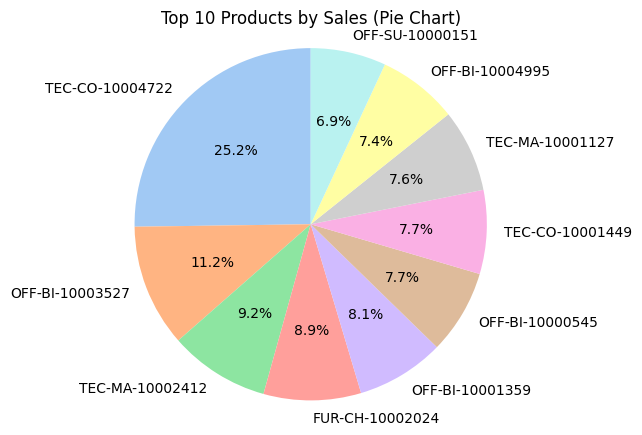

In [31]:

# 1. Calculate total sales for each product
product_sales = df.groupby('product_id')['sale_price'].sum().reset_index()

# 2. Sort by total sales to get the top 10 products
top_10_products = product_sales.sort_values(by='sale_price', ascending=False).head(10)

# 3. Pie Chart for Top 10 Products by Sales
plt.figure(figsize=(5, 5))
plt.pie(top_10_products['sale_price'], labels=top_10_products['product_id'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Products by Sales (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


2. Find top 5 highest selling products in each region.

C:\Users\SHUBH\AppData\Local\Temp\ipykernel_10176\151211112.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_region = region_product_sales.groupby('region').apply(lambda x: x.nlargest(5, 'quantity')).reset_index(drop=True)


     region       product_id  quantity
0   Central  OFF-BI-10000301        34
1   Central  OFF-BI-10000756        33
2   Central  OFF-BI-10000546        29
3   Central  OFF-BI-10001249        29
4   Central  FUR-CH-10002304        27
5      East  OFF-PA-10001970        33
6      East  OFF-BI-10003656        32
7      East  FUR-FU-10004848        31
8      East  OFF-FA-10000621        31
9      East  OFF-FA-10002780        29
10    South  OFF-ST-10003716        26
11    South  FUR-CH-10000513        24
12    South  OFF-BI-10004728        24
13    South  OFF-BI-10000014        23
14    South  FUR-FU-10001731        21
15     West  TEC-AC-10003832        45
16     West  OFF-BI-10000174        32
17     West  OFF-BI-10001036        31
18     West  OFF-BI-10001670        29
19     West  OFF-ST-10002486        29


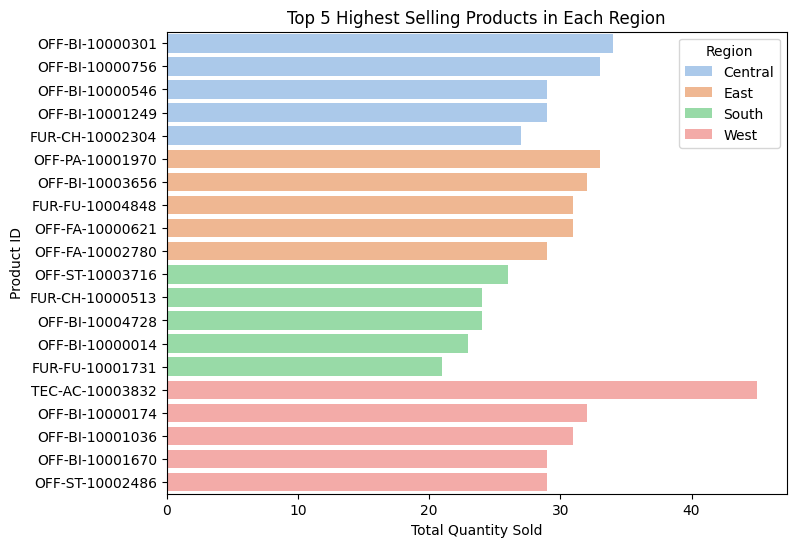

In [32]:

# 1. Group by 'region' and 'product_id' to calculate the total quantity sold for each product in each region
region_product_sales = df.groupby(['region', 'product_id'])['quantity'].sum().reset_index()

# 2. Sort the data within each region by total quantity sold and take the top 5 products for each region
top_5_per_region = region_product_sales.groupby('region').apply(lambda x: x.nlargest(5, 'quantity')).reset_index(drop=True)

# Print the result
print(top_5_per_region)

# 3. Visualizing the top 5 products in each region using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='quantity', y='product_id', hue='region', data=top_5_per_region, palette='pastel')
plt.title('Top 5 Highest Selling Products in Each Region')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product ID')
plt.legend(title='Region')
plt.show()


3. Find month over month growth comparison for 2022 and 2023 sales eg : jan 2022 vs jan 2023?

year       2022      2023     Growth
month                               
1       94712.5   88632.6  -6.419322
2       90091.0  128124.2  42.216426
3       80106.0   82512.3   3.003895
4       95451.6  111568.6  16.884997
5       79448.3   86447.9   8.810258
6       94170.5   68976.5 -26.753601
7       78652.2   90563.8  15.144649
8      104808.0   87733.6 -16.291123
9       79142.2   76658.6  -3.138149
10     118912.7  121061.5   1.807040
11      84225.3   75432.8 -10.439262
12      95869.9  102556.1   6.974243


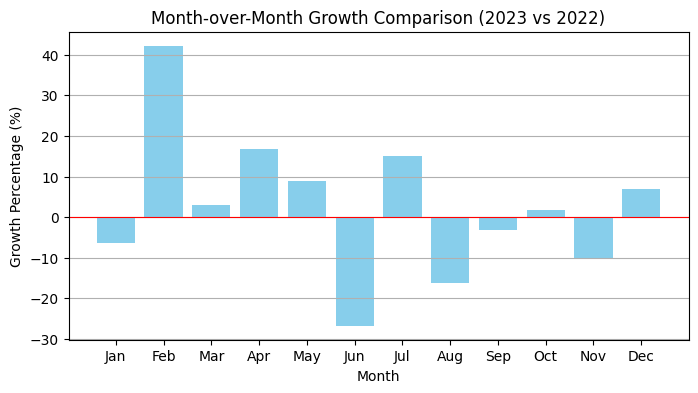

In [34]:
# 1. Filter the DataFrame for the years 2022 and 2023
df['year'] = df['order_date'].dt.year  # Extract year
df['month'] = df['order_date'].dt.month  # Extract month

# Filter for 2022 and 2023
filtered_df = df[(df['year'] == 2022) | (df['year'] == 2023)]

# 2. Group by year and month, summing the sales
monthly_sales = filtered_df.groupby(['year', 'month'])['sale_price'].sum().reset_index()

# 3. Pivot the DataFrame for easier comparison
monthly_sales_pivot = monthly_sales.pivot(index='month', columns='year', values='sale_price').fillna(0)

# 4. Calculate Month-over-Month Growth
monthly_sales_pivot['Growth'] = ((monthly_sales_pivot[2023] - monthly_sales_pivot[2022]) / monthly_sales_pivot[2022]) * 100

# Print the results
print(monthly_sales_pivot)

# 5. Visualization of Month-over-Month Growth
plt.figure(figsize=(8, 4))
plt.bar(monthly_sales_pivot.index, monthly_sales_pivot['Growth'], color='skyblue')
plt.axhline(0, color='red', linewidth=0.8)  # Add a horizontal line at 0 for reference
plt.title('Month-over-Month Growth Comparison (2023 vs 2022)')
plt.xlabel('Month')
plt.ylabel('Growth Percentage (%)')
plt.xticks(monthly_sales_pivot.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


 4. For each category which month had highest sales 

In [35]:
# 1. Extract Month from order_date
df['month'] = df['order_date'].dt.month  # Extract month

# 2. Group by 'category' and 'month', summing the sales
monthly_category_sales = df.groupby(['category', 'month'])['sale_price'].sum().reset_index()

# 3. Identify the month with the highest sales for each category
highest_sales_per_category = monthly_category_sales.loc[
    monthly_category_sales.groupby('category')['sale_price'].idxmax()
].reset_index(drop=True)

# Print the result
print(highest_sales_per_category)


          category  month  sale_price
0        Furniture      8     71649.5
1  Office Supplies      2     77959.5
2       Technology     10    103021.1


5. Which sub category had highest growth by profit in 2023 compare to 2022?

In [51]:
# 1. Filter the DataFrame for the years 2022 and 2023
df['year'] = df['order_date'].dt.year  # Extract year

# Filter for 2022 and 2023
filtered_df = df[(df['year'] == 2022) | (df['year'] == 2023)]

# 2. Group by 'sub_category' and 'year', summing the profit
sub_category_profit = filtered_df.groupby(['sub_category', 'year'])['profit'].sum().reset_index()

# 3. Pivot the DataFrame for easier comparison
profit_pivot = sub_category_profit.pivot(index='sub_category', columns='year', values='profit').fillna(0)

# 4. Calculate Growth from 2022 to 2023
profit_pivot['Growth'] = ((profit_pivot[2023] - profit_pivot[2022]) / profit_pivot[2022]) * 100

# 5. Identify the Sub-Category with the Highest Growth
highest_growth_sub_category = profit_pivot['Growth'].idxmax()
highest_growth_value = profit_pivot['Growth'].max()

# Print the highest growth sub-category
print(f'The sub-category with the highest growth by profit in 2023 compared to 2022 is "{highest_growth_sub_category}" with a growth of {highest_growth_value:.2f}%.')


The sub-category with the highest growth by profit in 2023 compared to 2022 is "Machines" with a growth of 50.19%.
